# 이상값 처리

## 1. 필요 라이브러리 Import 

In [1]:
import random # 의사 난수 생성 package
import pandas as pd # pandas package
import numpy as np  # numpy package : np.nan 이용 결측값 생성 
import scipy.stats as stats 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
%matplotlib inline
import seaborn as sns # seaborn 시각화 패키지 

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

## 2.Z검정(Z-Test)을 이용한 이상값 처리 

### 1) 데이터 생성 

In [2]:
# 3000개의 랜덤 데이터 생성 
np_data = np.random.randint(1, 100, size = 3000)
data = list(np_data)

In [4]:
data[0:2]

[57, 19]

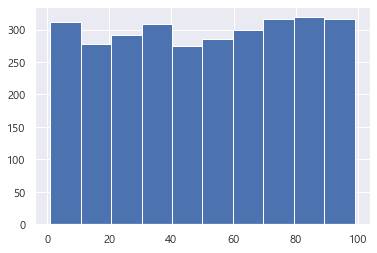

In [3]:
# 히스토그램으로 생성된 데이터 분포 확인 
plt.hist(data)
plt.show()

50.63333333333333
28.809944270839694


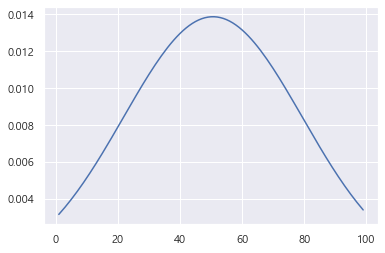

In [6]:
# Data의 정규분포 확인
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

# 확률 밀도 함수 생성 
pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

1.4210854715202004e-17
1.0


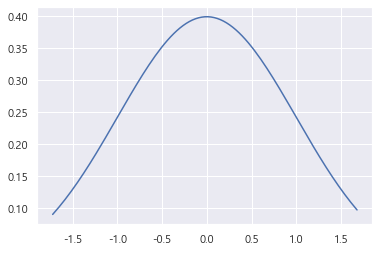

In [7]:
# 표준정규분포(Z분포)로 변환 
std_list = [] 

for i in data:
    z = (i - data_mean) / data_std 
    std_list.append(z) 
    
    
ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

### 2) 데이터 셋에 이상치 추가  

50.60332225913621
29.107775255500385


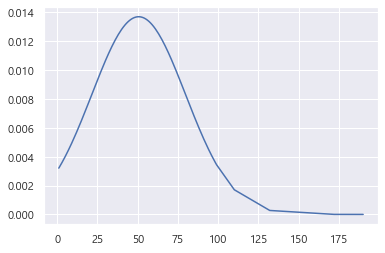

In [215]:
# 이상치 추가 

ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2)  # 이상치 생성 

    
# 이상치가 추가 된 데이터의 정규 분포도 
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

-2.124546385993655e-17
1.0


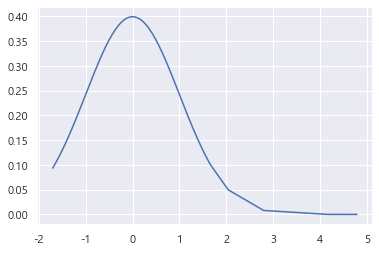

In [216]:
#이상치 추가 된 데이터의 표준화 

ol_std_list = []

for i in ol_data:
    z = (i - ol_data_mean) / ol_data_std 
    ol_std_list.append(z) 
    
ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)


ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

### 3) Z값의 2가 넘어 가는 데이터 삭제 

In [217]:
# 전체 라인수 확인 
len(ol_std_list)

3010

In [221]:
# -2 ~ 2 범위 벗어나면 이상치로 제거

for i in ol_std_list :
    z = i 
    if z > 2 :
        ol_std_list.remove(z)
    if z < -2 :
        ol_std_list.remove(z)    


In [222]:
# 이상치 제거 후 라인수 
len(ol_std_list)

3005

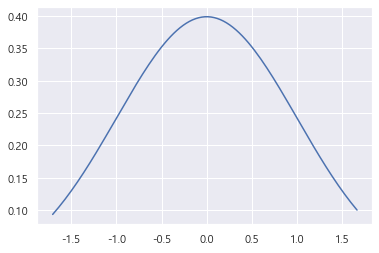

In [223]:
# 이상치 제거 후 표준정규분포 확인 
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

## 3. 사분위수 범위로 이상값 삭제 

### 1) 이상값 데이터 생성

In [43]:
# 이상값 데이터 생성 
boxdata = pd.DataFrame(np.random.randn(100, 3),columns=["A열","B열","C열"])

In [44]:
boxdata.head()

,A열,B열,C열
0,0.144778,0.315431,-0.166954
1,-0.396906,-0.172399,-1.537866
2,-0.671021,0.929022,-0.063557
3,0.928770,0.092117,1.482052
4,0.357873,-0.607522,0.599407


### 2) 이상값 데이터 확인 

In [45]:
# 기술 통계 정보로 pencentile 확인 
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,0.154093,0.031458,-0.084084
std,0.885967,0.963113,0.874379
min,-1.840986,-2.814284,-1.832257
25%,-0.417984,-0.642809,-0.813425
50%,-0.011729,-0.007871,-0.090450
75%,0.782638,0.710421,0.517468
max,2.844644,2.662773,1.975454


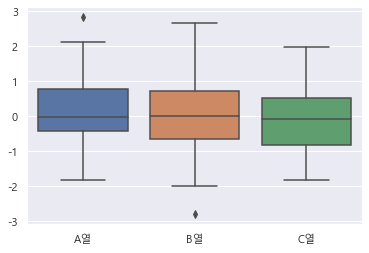

In [46]:
# 박스 플롯을 이용한 이상값 확인  
sns.boxplot(data = boxdata)
plt.show()

In [47]:
q1 = boxdata['B열'].quantile(0.25)
q2 = boxdata['B열'].quantile(0.5)
q3 = boxdata['B열'].quantile(0.75)
q4 = boxdata['B열'].quantile(1)
IQR = q3 - q1

print(q1)
print(q2)
print(q3)
print(q4)
print(IQR)


-0.6428088836920509
-0.00787138024063835
0.7104213382321325
2.6627729888576317
1.3532302219241834


### 2) 이상값 확인 

In [48]:
# 이상값 계산 하는 함수 
def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx


In [49]:
# 함수 사용해서 이상치 값 확인 
outlier_idx = get_outlier(df=boxdata, column='B열', weight=1.5)

In [50]:
outlier_idx

Int64Index([68], dtype='int64')

In [51]:
# 이상치 삭제 
boxdata.drop(outlier_idx, axis=0, inplace=True)

In [52]:
boxdata.shape

(99, 3)

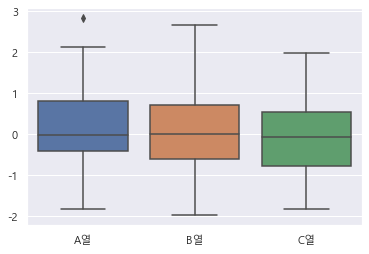

In [53]:
# 박스 플롯을 이용한 이상값 확인  
sns.boxplot(data = boxdata)
plt.show()

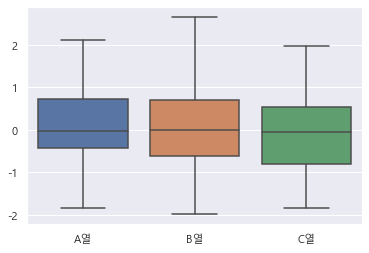

In [54]:
# 함수 사용해서 이상치 값 확인 
outlier_idx = get_outlier(df=boxdata, column='A열', weight=1.5)

outlier_idx

# 이상치 삭제 
boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

# 박스 플롯을 이용한 이상값 확인  
sns.boxplot(data = boxdata)
plt.show()

In [55]:
boxdata.shape

(98, 3)